# Regression Models

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [51]:
# Load California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [53]:
X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
y.head(5)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [59]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluation Metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, R^2: {r2_linear}")


Linear Regression - MSE: 0.555891598695244, R^2: 0.5757877060324511


In [61]:
# Polynomial Regression Model (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
X_poly_test = poly_features.transform(X_test)
y_pred_poly = poly_model.predict(X_poly_test)

# Evaluation Metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - MSE: {mse_poly}, R^2: {r2_poly}")


Polynomial Regression - MSE: 0.46430152591647755, R^2: 0.6456819713340498


In [63]:
# SVR Model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluation Metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - MSE: {mse_svr}, R^2: {r2_svr}")


SVR - MSE: 1.3320115421348744, R^2: -0.01648536010717372


In [65]:
# Decision Tree Regression Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluation Metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression - MSE: {mse_tree}, R^2: {r2_tree}")


Decision Tree Regression - MSE: 0.495235205629094, R^2: 0.622075845135081


In [67]:
# Random Forest Regression Model with Hyperparameter Tuning
ssrf_model = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=3)
grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.best_estimator_.predict(X_test)

# Evaluation Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - MSE: {mse_rf}, R^2: {r2_rf}")


Random Forest Regression - MSE: 0.2558668230358652, R^2: 0.8047427732223399


In [69]:
# Ridge Regression Model with Hyperparameter Tuning
ridge_model = Ridge()
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
grid_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=3)
grid_ridge.fit(X_train, y_train)

y_pred_ridge = grid_ridge.best_estimator_.predict(X_test)

# Evaluation Metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge}, R^2: {r2_ridge}")


Ridge Regression - MSE: 0.5558827543113799, R^2: 0.5757944553633935


In [71]:
# Lasso Regression Model with Hyperparameter Tuning
lasso_model = Lasso()
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}
grid_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=3)
grid_lasso.fit(X_train, y_train)

y_pred_lasso = grid_lasso.best_estimator_.predict(X_test)

# Evaluation Metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso}, R^2: {r2_lasso}")


Lasso Regression - MSE: 0.6135115198058131, R^2: 0.5318167610318159


In [73]:
#Explanation of Chosen Metrics
#Mean Squared Error (MSE) measures the average squared difference between predicted and actual values. It is sensitive to outliers and provides a clear indication of model performance.
#R-squared indicates the proportion of variance in the dependent variable that can be explained by the independent variables in the model. It provides insight into how well the model fits the data.\
#Hyperparameter Tuning Strategy
#For models like Random Forest and Ridge/Lasso regression that have hyperparameters affecting their performance:
#GridSearchCV was used to systematically explore multiple combinations of parameters.
#A cross-validation approach was applied to ensure that the model's performance is robust and not overly fitted to a particular train-test split.

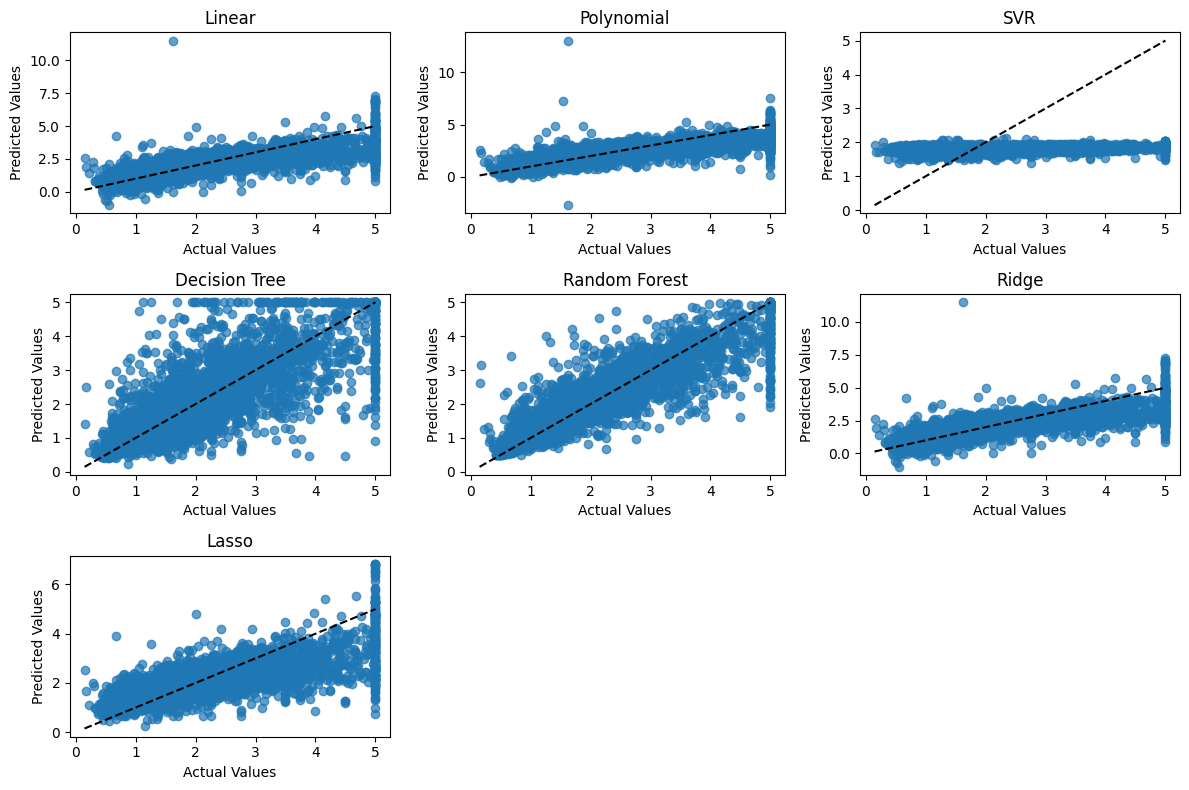

In [75]:
plt.figure(figsize=(12, 8))

models_names = ['Linear', 'Polynomial', 'SVR', 'Decision Tree', 'Random Forest', 'Ridge', 'Lasso']
models_predictions = [y_pred_linear, y_pred_poly, y_pred_svr,
                      y_pred_tree, y_pred_rf,
                      y_pred_ridge, y_pred_lasso]

for i in range(len(models_names)):
    plt.subplot(3, 3, i + 1)
    plt.scatter(y_test, models_predictions[i], alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
    plt.title(models_names[i])
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


### After executing all models and evaluating their performance metrics (MSE and R²), we can compare them based on these metrics:
### Best Performing Model: The model with the lowest MSE and highest R² is considered the best performer.Here,in our case it is Random Forest
### Refer docs for more information


# CNN

In [79]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [81]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [83]:
# Preprocess data: reshape and normalize
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [85]:
# Build CNN model
model = models.Sequential()

# Convolutional layer with ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Second pooling layer
model.add(layers.MaxPooling2D((2, 2)))

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
# Flattening layer
model.add(layers.Flatten())
# Fully connected layer
model.add(layers.Dense(64, activation='relu'))
# Output layer with Softmax activation
model.add(layers.Dense(10, activation='softmax'))

In [89]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [91]:
# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.8771 - loss: 0.4065 - val_accuracy: 0.9822 - val_loss: 0.0555
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9827 - loss: 0.0570 - val_accuracy: 0.9869 - val_loss: 0.0389
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9881 - loss: 0.0372 - val_accuracy: 0.9894 - val_loss: 0.0314
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9912 - loss: 0.0274 - val_accuracy: 0.9906 - val_loss: 0.0304
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9900 - val_loss: 0.0308


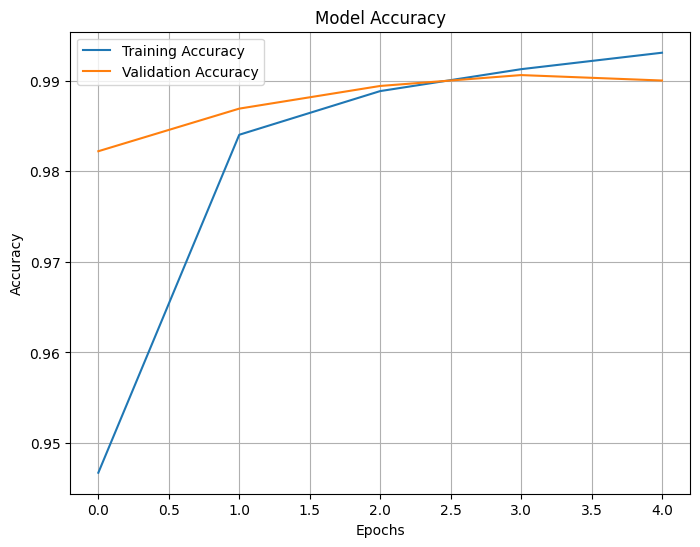

In [93]:
# Visualize training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


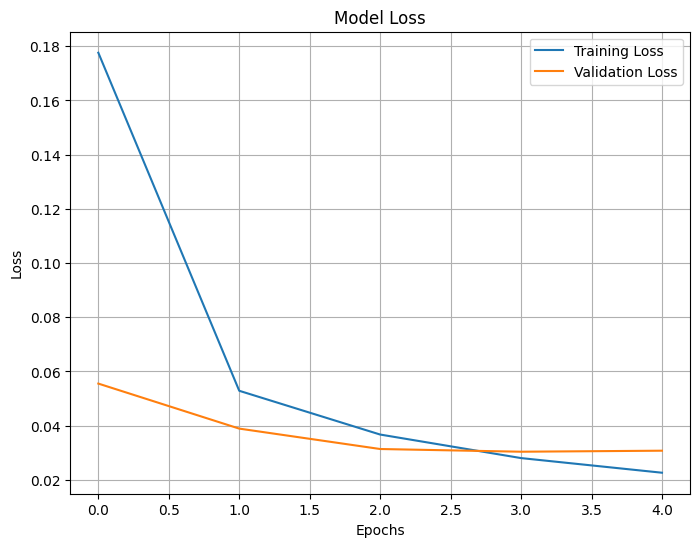

In [95]:

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# LSTMs

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [99]:
# Generate synthetic time series data
def generate_time_series_data(timesteps):
    x = np.linspace(0, 100, timesteps)
    y = np.sin(x) + np.random.normal(scale=0.5, size=timesteps)  # Sine wave with noise
    return y

In [101]:
# Prepare data
timesteps = 200
data = generate_time_series_data(timesteps)
data = data.reshape(-1, 1)

# Scale data to range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [103]:
# Create sequences for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [105]:
# Set time step for sequences
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [107]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))  # Regularization to prevent overfitting
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [109]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [111]:
# Train model
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2583
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0915
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0830
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0625
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0625
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0635
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0580
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0590
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0594
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0587
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0518
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0557 
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0510
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0539
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0518
Epoch 16/100
6/6 ━

In [113]:
# Make predictions
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


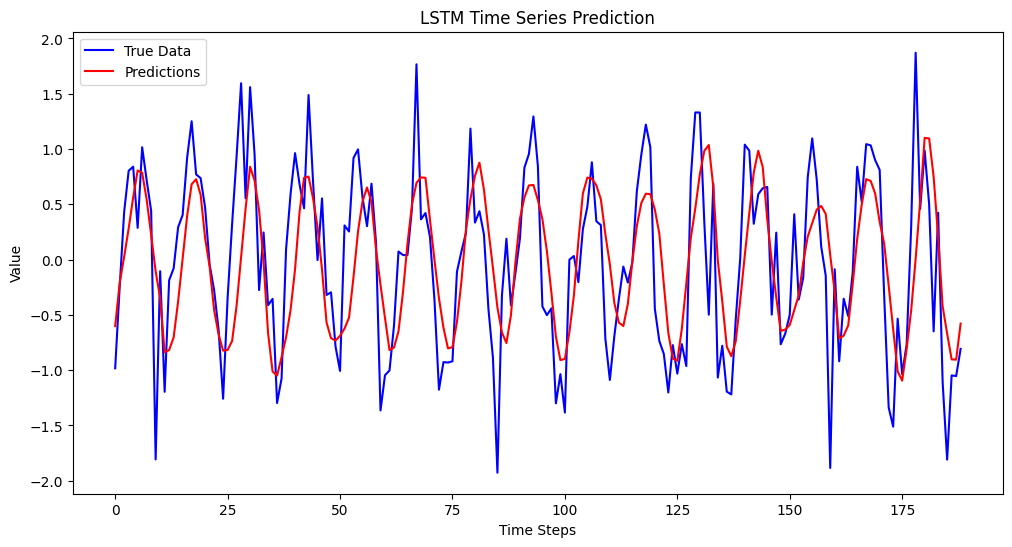

In [115]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data[time_step + 1:], label='True Data', color='blue')
plt.plot(predictions, label='Predictions', color='red')
plt.title('LSTM Time Series Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()